In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/Weather_Prediction.csv")

In [ ]:
df["RainTomorrow"] = df["RainTomorrow"].replace({"Yes":"1","No":"0"})
df["RainToday"] = df["RainToday"].replace({"Yes":"1","No":"0"})
df["RainTomorrow"] = df["RainTomorrow"].astype("int64")

In [ ]:
df.sample(5)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4036,4036,2012-01-02,BadgerysCreek,13.6,29.9,0.0,NaN,NaN,ENE,28.0,...,40.0,1018.5,1015.3,NaN,NaN,21.2,29.7,0,0.0,0
336,336,2009-11-04,Albury,10.0,23.2,0.0,NaN,NaN,WNW,39.0,...,27.0,1017.1,1015.8,NaN,NaN,15.0,22.6,0,0.0,0
20561,20561,2017-04-30,NorahHead,14.0,21.5,1.0,NaN,NaN,SSW,28.0,...,74.0,1022.6,1020.7,NaN,NaN,16.1,19.8,0,0.2,0
1576,1576,2013-07-11,Albury,1.7,15.1,0.0,NaN,NaN,SE,15.0,...,60.0,1035.2,1032.0,NaN,NaN,6.6,13.9,0,0.0,0
12781,12781,2011-07-21,Moree,3.5,18.9,0.0,3.0,9.9,SW,43.0,...,36.0,1016.6,1013.8,0.0,1.0,9.2,18.1,0,0.0,0


In [ ]:
df["Year"] = df["Date"].apply(lambda x: x.split("-")[0])
df["Year"] = df["Year"].astype("int64")

In [ ]:
df["month"] = df["Date"].apply(lambda x: x.split("-")[1])
df["month"] = df["month"].astype("int64")

In [ ]:
df.head(2)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,month
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,1007.1,8.0,NaN,16.9,21.8,0,0.0,0,2008,12
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,1007.8,NaN,NaN,17.2,24.3,0,0.0,0,2008,12


In [ ]:
df.shape

(25000, 27)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
Date                 0
Location             0
MinTemp            331
MaxTemp            176
Rainfall           279
Evaporation      15568
Sunshine         18336
WindGustDir       3457
WindGustSpeed     3455
WindDir9am        3072
WindDir3pm        1733
WindSpeed9am       572
WindSpeed3pm      1230
Humidity9am        391
Humidity3pm       1064
Pressure9am       4828
Pressure3pm       4827
Cloud9am         10864
Cloud3pm         11185
Temp9am            245
Temp3pm            918
RainToday          279
RISK_MM              0
RainTomorrow         0
Year                 0
month                0
dtype: int64

In [ ]:
df = df.drop(columns=["Date","Unnamed: 0","Evaporation","Sunshine","Cloud9am","Cloud3pm"])

In [ ]:
df.shape

(25000, 21)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['RainTomorrow']),
                                                 df['RainTomorrow'],
                                                 test_size=0.2,
                                                random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       25000 non-null  object 
 1   MinTemp        24669 non-null  float64
 2   MaxTemp        24824 non-null  float64
 3   Rainfall       24721 non-null  float64
 4   WindGustDir    21543 non-null  object 
 5   WindGustSpeed  21545 non-null  float64
 6   WindDir9am     21928 non-null  object 
 7   WindDir3pm     23267 non-null  object 
 8   WindSpeed9am   24428 non-null  float64
 9   WindSpeed3pm   23770 non-null  float64
 10  Humidity9am    24609 non-null  float64
 11  Humidity3pm    23936 non-null  float64
 12  Pressure9am    20172 non-null  float64
 13  Pressure3pm    20173 non-null  float64
 14  Temp9am        24755 non-null  float64
 15  Temp3pm        24082 non-null  float64
 16  RainToday      24721 non-null  object 
 17  RISK_MM        25000 non-null  float64
 18  RainTo

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

encoder = ce.CountEncoder()
X_train[["Location","WindGustDir","WindDir9am","WindDir3pm"]] = encoder.fit_transform(X_train[["Location","WindGustDir","WindDir9am","WindDir3pm"]])
X_test[["Location","WindGustDir","WindDir9am","WindDir3pm"]] = encoder.transform(X_test[["Location","WindGustDir","WindDir9am","WindDir3pm"]])

In [ ]:
# X_train = pd.get_dummies(X_train,drop_first=True)
# X_test = pd.get_dummies(X_test,drop_first=True)

In [ ]:
impute = KNNImputer(n_neighbors=5)
X_train = impute.fit_transform(X_train)
X_test = impute.transform(X_test)

In [ ]:
df.isna().sum()

In [ ]:
np.where(np.isnan(X_train)==True)

In [ ]:
rnd = RandomForestClassifier()

In [ ]:
rnd.fit(X_train,y_train)

In [ ]:
y_prd = rnd.predict(X_test)
y_prd

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_prd)

In [ ]:
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

In [ ]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(rnd,X,y,cv=10)
np.mean(cv)

0.9999200000000001

Text(0.5, 23.52222222222222, 'Predicted label')

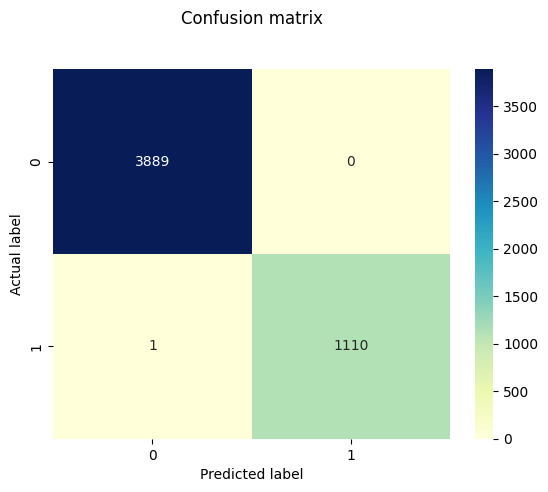

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_prd)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
X_train.to_csv("X_train.csv",index=False)
X_test.to_csv("X_test.csv",index=False)

y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

Using_KNN_Algorithoms

In [ ]:
X_train1 = pd.read_csv("/content/X_train.csv")
X_test1 = pd.read_csv("/content/X_test.csv")
y_train1 = pd.read_csv("/content/y_train.csv")
y_test1 = pd.read_csv("/content/y_test.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train_scaler = scaler.fit_transform(X_train1)
X_test_scaler = scaler.transform(X_test1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_scaler,y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_prd1 = knn.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1,y_prd1)

0.864

In [ ]:
X = np.concatenate((X_train_scaler,X_test_scaler))
y = np.concatenate((y_train1,y_test1))

In [ ]:
from sklearn.model_selection import cross_val_score



cv = cross_val_score(knn,X,y,cv=10)
np.mean(cv)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

0.8622400000000001

Using_Decission_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train_scaler,y_train1)

DecisionTreeClassifier()

In [ ]:
y_prd2 = dtc.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1,y_prd2)

1.0

In [ ]:
X = np.concatenate((X_train_scaler,X_test_scaler))
y = np.concatenate((y_train1,y_test1))

In [ ]:
from sklearn.model_selection import cross_val_score



cv = cross_val_score(dtc,X,y,cv=10)
np.mean(cv)

1.0